# Dividir el dataset en conjunto de entrenamiento y de testing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
#data = pd.read_csv("../datasets/ads/Advertising.csv")
#data_ads = pd.read_csv("../datasets/ads/Advertising.csv")
mainpath="/home/juan/Documentos/DATA SCIENCE/python-ml-course-master/datasets/"
filename="ads/Advertising.csv"
fullpath=os.path.join(mainpath, filename)
data=pd.read_csv(fullpath,sep=",")

In [4]:
a = np.random.randn(len(data))

(array([ 7., 18., 25., 43., 44., 34., 17.,  8.,  1.,  3.]),
 array([-2.1712701 , -1.64382389, -1.11637769, -0.58893148, -0.06148528,
         0.46596093,  0.99340713,  1.52085334,  2.04829954,  2.57574575,
         3.10319195]),
 <BarContainer object of 10 artists>)

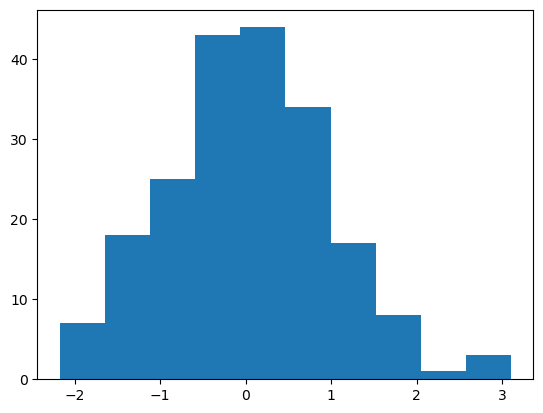

In [5]:
plt.hist(a)

In [6]:
#dividiendo el conunto de datos 
check = (a<0.8)
training = data[check]#80% de datos par entrenamiento
testing = data[~check]# el restante (20%) para validacion

In [7]:
len(training), len(testing)

(159, 41)

In [8]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     718.8
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           1.90e-79
Time:                        16:11:49   Log-Likelihood:                -307.44
No. Observations:                 159   AIC:                             620.9
Df Residuals:                     156   BIC:                             630.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9095      0.324      8.980      0.000       2.270       3.549
TV             0.0471      0.002     29.805      0.000       0.044       0.050
Radio          0.1834      0.009     20.687      0.000       0.166       0.201
==============================================================================
Omnibus:                       52.038   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.056
Skew:                          -1.361   Prob(JB):                     2.11e-29
Kurtosis:                       6.539   Cond. No.                         406.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.9336 + 0.0465 * TV + 0.1807 * Radio

## Validación del modelo con el conjunto de testing

In [10]:
sales_pred = lm.predict(testing)
sales_pred

3      17.618165
6      11.632984
8       3.699596
26     15.012237
35     17.349591
39     20.560005
41     17.369897
45     15.281206
56      8.407179
57     12.844262
59     18.241400
67     12.128179
74     17.469799
77     13.810762
85     15.381473
97     15.467533
98     24.308966
101    23.523956
108     3.599680
109    19.869297
116    12.086788
117     6.653636
131    15.928781
136    11.268092
141    18.523075
144    10.153766
149     9.746367
150    18.676193
151    10.147659
152    16.487389
159    12.485640
165    14.574926
166    10.648743
174    14.005177
176    20.144960
178    16.360229
180    10.760138
184    18.766833
190    12.307769
194    16.487943
197    12.949590
dtype: float64

In [12]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

116.41005432175017

In [13]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.7502635464841632

In [14]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.124325719691356

<Axes: xlabel='TV', ylabel='Sales'>

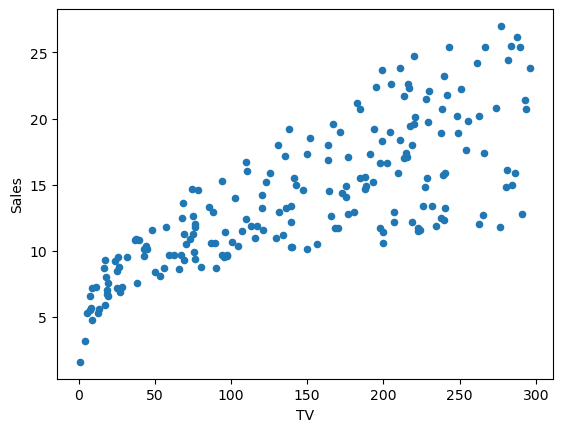

In [15]:
%matplotlib inline
data.plot(kind = "scatter", x = "TV", y ="Sales")
#plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth = 2)

In [16]:
from IPython.display import Image
Image(filename="resources/summary-lm.png")

FileNotFoundError: [Errno 2] No such file or directory: 'resources/summary-lm.png'